In [2]:
import numpy as np
import pandas as pd

# Воспроизводимость
RANDOM_STATE = 42

# Библиотеки sklearn для данных, моделей, разбиения и метрик
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    classification_report,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    brier_score_loss,
)

# Для калибровки
from sklearn.calibration import CalibratedClassifierCV

In [10]:
df = pd.read_csv('data\S05-hw-dataset.csv')

df.head()

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Lenovo-PC\AppData\Local\Temp\ipykernel_32496\308020718.py:1: SyntaxWarning: invalid escape sequence '\S'
  df = pd.read_csv('data\S05-hw-dataset.csv')


,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
0,1,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8,0
1,2,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7,0
2,3,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5,0
3,4,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7,1
4,5,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   client_id                       3000 non-null   int64  
 1   age                             3000 non-null   int64  
 2   income                          3000 non-null   int64  
 3   years_employed                  3000 non-null   int64  
 4   credit_score                    3000 non-null   int64  
 5   debt_to_income                  3000 non-null   float64
 6   num_credit_cards                3000 non-null   int64  
 7   num_late_payments               3000 non-null   int64  
 8   has_mortgage                    3000 non-null   int64  
 9   has_car_loan                    3000 non-null   int64  
 10  savings_balance                 3000 non-null   int64  
 11  checking_balance                3000 non-null   int64  
 12  region_risk_score               30

In [6]:
df.describe()

,client_id,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,45.059667,69658.992000,19.577667,649.285333,0.284065,3.494667,6.869333,0.495000,0.501333,20607.256667,5559.684333,0.400175,9.524667,1.976333,6.968667,0.410333
std,866.169729,14.192883,24742.235182,11.381497,69.955852,0.161112,2.289917,4.291278,0.500058,0.500082,14035.209739,6306.032612,0.204529,5.779030,1.408700,4.349942,0.491976
min,1.000000,21.000000,15000.000000,0.000000,402.000000,0.006147,0.000000,0.000000,0.000000,0.000000,0.000000,-3000.000000,0.001148,0.000000,0.000000,0.000000,0.000000
25%,750.750000,33.000000,52641.750000,10.000000,604.000000,0.157796,1.000000,3.000000,0.000000,0.000000,9612.250000,341.500000,0.239208,5.000000,1.000000,3.000000,0.000000
50%,1500.500000,45.000000,69784.500000,20.000000,647.000000,0.261726,3.000000,7.000000,0.000000,1.000000,20021.000000,5114.500000,0.381992,10.000000,2.000000,7.000000,0.000000
75%,2250.250000,57.000000,85874.250000,29.000000,697.000000,0.388886,6.000000,10.000000,1.000000,1.000000,30101.250000,9906.250000,0.549213,15.000000,3.000000,11.000000,1.000000
max,3000.000000,69.000000,156351.000000,39.000000,850.000000,0.878343,7.000000,14.000000,1.000000,1.000000,75237.000000,29335.000000,0.961733,19.000000,4.000000,14.000000,1.000000


In [ ]:
df['default'].value_counts(normalize=True)
# Наблюдения
# количество строк = 3000, количество столбцов(признаков) = 16 - 1(таргет) 
# явных аномалий нет. возраст [21, 69], доход положительный, все что связано с количеством(звонки за послед 3 месяца, кол-во карт и кредитов) все в пределах нормы
# баланс классов ниже
# 0    0.589667
# 1    0.410333

default
0    0.589667
1    0.410333
Name: proportion, dtype: float64

In [11]:
df = df.drop('client_id', axis=1)
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
#numerical_cols
corr_matrix = df[numerical_cols.tolist()].corr()
corr_matrix

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years,default
age,1.000000,-0.000858,-0.003797,-0.027858,-0.010399,-0.002027,-0.003102,-0.000216,0.000717,0.031810,0.010176,0.014665,-0.009488,0.024287,-0.004976,0.025813
income,-0.000858,1.000000,-0.008023,0.013988,0.024147,0.012785,0.010370,-0.002315,0.010915,-0.002663,-0.000262,-0.000274,0.050013,-0.001342,0.052079,0.001395
years_employed,-0.003797,-0.008023,1.000000,-0.023242,0.001980,-0.007424,-0.007609,0.032233,0.007217,0.009526,-0.022012,0.004321,-0.036294,-0.014766,-0.011165,0.005829
credit_score,-0.027858,0.013988,-0.023242,1.000000,-0.006700,0.006167,0.010372,0.013586,0.017517,0.010733,-0.012867,0.020880,0.011107,-0.017286,0.006054,-0.216288
debt_to_income,-0.010399,0.024147,0.001980,-0.006700,1.000000,-0.026074,0.034909,-0.018165,0.022987,0.015311,-0.019477,0.010686,0.019771,0.000258,-0.021309,0.383239
num_credit_cards,-0.002027,0.012785,-0.007424,0.006167,-0.026074,1.000000,0.009057,-0.000460,-0.013679,0.022336,0.021430,-0.013675,0.010794,-0.009601,0.013541,-0.026323
num_late_payments,-0.003102,0.010370,-0.007609,0.010372,0.034909,0.009057,1.000000,0.025490,0.015619,0.009765,-0.000415,0.012879,0.010470,-0.018273,-0.022441,0.281268
has_mortgage,-0.000216,-0.002315,0.032233,0.013586,-0.018165,-0.000460,0.025490,1.000000,0.023361,-0.015954,0.015213,-0.001013,0.006100,0.022316,0.014951,0.101185
has_car_loan,0.000717,0.010915,0.007217,0.017517,0.022987,-0.013679,0.015619,0.023361,1.000000,-0.018872,0.027189,-0.005825,0.001950,-0.033798,-0.004733,0.121786
savings_balance,0.031810,-0.002663,0.009526,0.010733,0.015311,0.022336,0.009765,-0.015954,-0.018872,1.000000,0.003438,0.014338,-0.021002,0.027103,0.003328,0.012065


In [12]:
corr_matrix['default'].sort_values(ascending=False)

default                           1.000000
debt_to_income                    0.383239
num_late_payments                 0.281268
region_risk_score                 0.225104
active_loans                      0.192997
has_car_loan                      0.121786
has_mortgage                      0.101185
checking_balance                  0.027769
phone_calls_to_support_last_3m    0.027342
age                               0.025813
savings_balance                   0.012065
years_employed                    0.005829
income                            0.001395
customer_tenure_years            -0.015804
num_credit_cards                 -0.026323
credit_score                     -0.216288
Name: default, dtype: float64

In [13]:
y = df['default']
X = df.drop('default', axis=1)

In [ ]:
X.head()
#y.head()
# при желании можно явно проверить диапазоны 
# (например, что debt_to_income в [0, 1]). 
# Этот пункт проверил когда испоьзовал decribe() 

,age,income,years_employed,credit_score,debt_to_income,num_credit_cards,num_late_payments,has_mortgage,has_car_loan,savings_balance,checking_balance,region_risk_score,phone_calls_to_support_last_3m,active_loans,customer_tenure_years
0,25,94074,22,839,0.547339,1,7,0,0,26057,5229,0.080052,19,1,8
1,58,51884,26,565,0.290882,1,1,0,1,16221,11595,0.428311,15,0,7
2,53,48656,39,561,0.522340,1,13,0,0,55448,-2947,0.770883,15,4,5
3,42,81492,30,582,0.709123,2,10,1,1,35188,17727,0.357619,0,2,7
4,42,94713,8,642,0.793392,3,3,0,0,0,-404,0.414260,17,1,10


In [17]:
# разделяем данные 
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp)


In [ ]:
baseline = DummyClassifier(strategy="most_frequent",random_state=42)
baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

# Accuracy : 0.59 наши 60 процентов изза дисбалнса классов 

=== Бейзлайн (DummyClassifier, most_frequent) – качество на validation ===
Accuracy : 0.59
Precision: 0.0
Recall   : 0.0
F1-score : 0.0
ROC-AUC  : 0.5


In [22]:
baseline = DummyClassifier(strategy="stratified",random_state=42)
baseline.fit(X_train, y_train)

y_val_pred_baseline = baseline.predict(X_val)
y_val_proba_baseline = baseline.predict_proba(X_val)[:, 1]

print("=== Бейзлайн (DummyClassifier, stratified) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_baseline))
print("Precision:", precision_score(y_val, y_val_pred_baseline, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_baseline, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_baseline, zero_division=0))

try:
    print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_baseline))
except ValueError as e:
    print("Не удалось посчитать ROC-AUC для бейзлайна:", e)

=== Бейзлайн (DummyClassifier, stratified) – качество на validation ===
Accuracy : 0.5133333333333333
Precision: 0.4108527131782946
Recall   : 0.43089430894308944
F1-score : 0.42063492063492064
ROC-AUC  : 0.5007578889348215


In [24]:
log_reg_pipeline = Pipeline(
    steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l2", C=1.0, solver="liblinear", random_state=42)),
    ]
)


In [28]:
log_reg_pipeline.fit(X_train, y_train)

y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=1.0) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred))

=== Логистическая регрессия (C=1.0) – качество на validation ===
Accuracy : 0.8166666666666667
Precision: 0.8505154639175257
Recall   : 0.6707317073170732
F1-score : 0.75
ROC-AUC  : 0.8746382802811079

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       354
           1       0.85      0.67      0.75       246

    accuracy                           0.82       600
   macro avg       0.83      0.79      0.80       600
weighted avg       0.82      0.82      0.81       600



In [31]:
param_grid = {
    "logreg__C": [0.01, 0.1, 1.0, 10.0, 100.0],
}

grid_search = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="roc_auc",    
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search_f1 = GridSearchCV(
    estimator=log_reg_pipeline,
    param_grid=param_grid,
    scoring="f1",    
    cv=5,
    n_jobs=-1,
    verbose=1,
)

grid_search.fit(X_train, y_train)
grid_search_f1.fit(X_train, y_train)
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшие параметры:", grid_search_f1.best_params_)
print("Лучший ROC-AUC (по CV):", grid_search.best_score_)
print("Лучший f1-score (по CV):", grid_search_f1.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Лучшие параметры: {'logreg__C': 0.1}
Лучшие параметры: {'logreg__C': 0.1}
Лучший ROC-AUC (по CV): 0.8535885101695057
Лучший f1-score (по CV): 0.7214265281418074


In [33]:
log_reg_pipeline = Pipeline(
    steps=[
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(penalty="l2", C=0.1, solver="liblinear", random_state=42)),
    ]
)

log_reg_pipeline.fit(X_train, y_train)

y_val_pred = log_reg_pipeline.predict(X_val)
y_val_proba = log_reg_pipeline.predict_proba(X_val)[:, 1]

print("=== Логистическая регрессия (C=0.1) – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba))

print("\nПодробный отчёт по классам (classification_report):")
print(classification_report(y_val, y_val_pred))


=== Логистическая регрессия (C=0.1) – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

Подробный отчёт по классам (classification_report):
              precision    recall  f1-score   support

           0       0.80      0.92      0.85       354
           1       0.85      0.67      0.75       246

    accuracy                           0.81       600
   macro avg       0.82      0.79      0.80       600
weighted avg       0.82      0.81      0.81       600



In [36]:
best_model = grid_search.best_estimator_
y_val_pred_best = best_model.predict(X_val)
y_val_proba_best = best_model.predict_proba(X_val)[:, 1]

print("=== Лучшая модель – качество на validation ===")
print("Accuracy :", accuracy_score(y_val, y_val_pred_best))
print("Precision:", precision_score(y_val, y_val_pred_best, zero_division=0))
print("Recall   :", recall_score(y_val, y_val_pred_best, zero_division=0))
print("F1-score :", f1_score(y_val, y_val_pred_best, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_val, y_val_proba_best))

# Оцениваем на test
y_test_pred = best_model.predict(X_test)
y_test_proba = best_model.predict_proba(X_test)[:, 1]

print("\n=== Лучшая модель – качество на test ===")
print("Accuracy :", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, zero_division=0))
print("Recall   :", recall_score(y_test, y_test_pred, zero_division=0))
print("F1-score :", f1_score(y_test, y_test_pred, zero_division=0))
print("ROC-AUC  :", roc_auc_score(y_test, y_test_proba))

print("\nClassification report (test):")
print(classification_report(y_test, y_test_pred))

=== Лучшая модель – качество на validation ===
Accuracy : 0.815
Precision: 0.8497409326424871
Recall   : 0.6666666666666666
F1-score : 0.7471526195899773
ROC-AUC  : 0.8746842129438244

=== Лучшая модель – качество на test ===
Accuracy : 0.805
Precision: 0.8056872037914692
Recall   : 0.6910569105691057
F1-score : 0.7439824945295405
ROC-AUC  : 0.8749598089201231

Classification report (test):
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       354
           1       0.81      0.69      0.74       246

    accuracy                           0.81       600
   macro avg       0.81      0.79      0.79       600
weighted avg       0.81      0.81      0.80       600



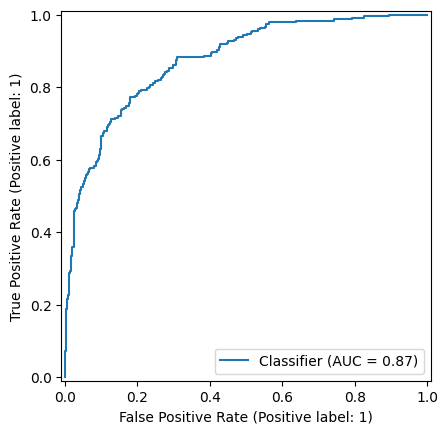

In [40]:
import matplotlib.pyplot as plt

RocCurveDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plt.savefig('figures/roc_curve.png')

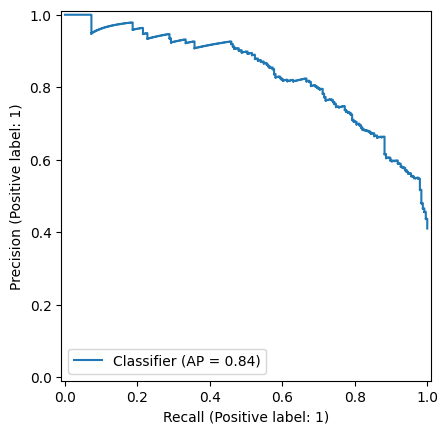

In [41]:
PrecisionRecallDisplay.from_predictions(
    y_test,
    y_test_proba,
)
plt.savefig('figures/precision_recall.png')

In [ ]:
# бейзлайн выбирает самый популярный класс(никаких вычислений и т.д), модель же что-то делает)
# об этом говорит и качество предсказаний 
# для DummyClasifier - Recall   : 0.43089430894308944 
#                      F1-score : 0.42063492063492064
#                      ROC-AUC  : 0.5007578889348215
#------------------------------------------------------
# для logreg -         Precision: 0.8056872037914692 
#                      Recall   : 0.6910569105691057 
#                      ROC-AUC  : 0.8749598089201231
# на метрику accuracy не ориентируемся т.к классы несбалансированные

